In [3]:
import joblib
import pandas as pd

# Load trained models and the validation/test datasets for evaluation
val_path = "/home/danial/Data Science/Churn Prediction/Data/Splitted/val.csv"
test_path = "/home/danial/Data Science/Churn Prediction/Data/Splitted/test.csv"

log_reg_pipe = joblib.load("/home/danial/Data Science/Churn Prediction/Models/logreg_baseline.pkl")
tree_pipe = joblib.load("/home/danial/Data Science/Churn Prediction/Models/decision_tree_baseline.pkl")

val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

X_val = val_df.drop(columns=["Churn"])
y_val = val_df["Churn"]

X_test = test_df.drop(columns=["Churn"])
y_test = test_df["Churn"]

print("Models and datasets loaded.")


Models and datasets loaded.


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions for validation set
val_pred_log = log_reg_pipe.predict(X_val)
val_pred_tree = tree_pipe.predict(X_val)

# Utility to print metrics for a model
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_true, y_pred))

# Evaluate both models
evaluate_model(y_val, val_pred_log, "Logistic Regression - Validation")
evaluate_model(y_val, val_pred_tree, "Decision Tree - Validation")



Logistic Regression - Validation
Accuracy : 0.8039772727272727
Precision: 0.6580645161290323
Recall   : 0.5454545454545454
F1-Score : 0.5964912280701754
ROC-AUC  : 0.7214700193423599

Decision Tree - Validation
Accuracy : 0.7357954545454546
Precision: 0.5024390243902439
Recall   : 0.5508021390374331
F1-Score : 0.5255102040816326
ROC-AUC  : 0.676755034702469


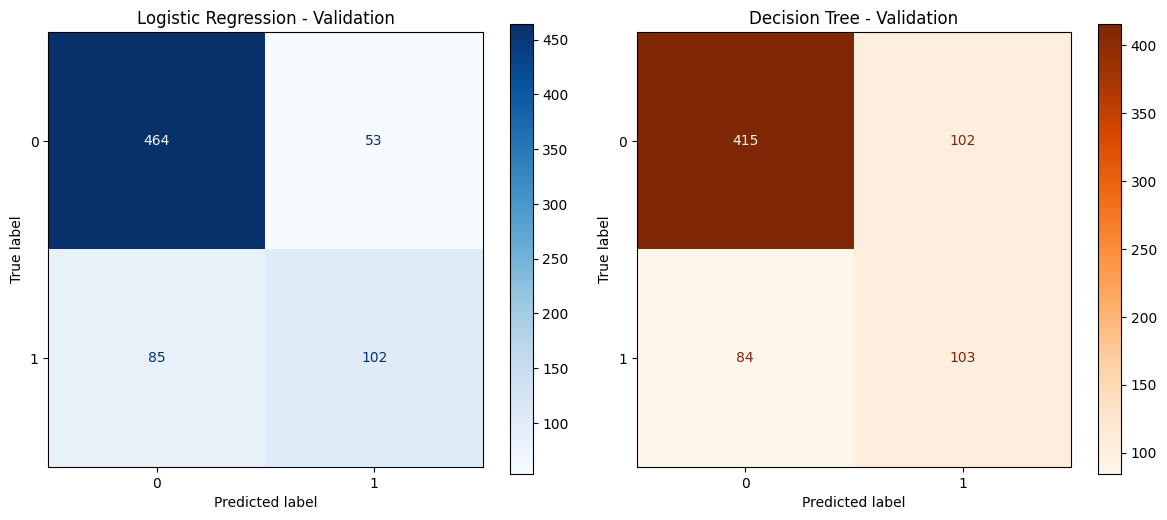

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrices for both models to understand their errors
fig, axes = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay.from_predictions(y_val, val_pred_log, ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression - Validation")

ConfusionMatrixDisplay.from_predictions(y_val, val_pred_tree, ax=axes[1], cmap='Oranges')
axes[1].set_title("Decision Tree - Validation")

plt.tight_layout()
plt.show()


In [6]:
# Use the unseen test set for final evaluation to avoid overfitting on validation data
test_pred_log = log_reg_pipe.predict(X_test)
test_pred_tree = tree_pipe.predict(X_test)

evaluate_model(y_test, test_pred_log, "Logistic Regression - Test")
evaluate_model(y_test, test_pred_tree, "Decision Tree - Test")



Logistic Regression - Test
Accuracy : 0.7929078014184398
Precision: 0.6413793103448275
Recall   : 0.49732620320855614
F1-Score : 0.5602409638554217
ROC-AUC  : 0.6984700514112279

Decision Tree - Test
Accuracy : 0.7574468085106383
Precision: 0.5425531914893617
Recall   : 0.5454545454545454
F1-Score : 0.544
ROC-AUC  : 0.6897156897156896


In [7]:
import numpy as np

# Find misclassified samples for a closer look at where the model struggles
misclassified_idx = np.where(test_pred_log != y_test)[0]
print("First 5 misclassified samples (Logistic Regression):")
display(test_df.iloc[misclassified_idx[:5]])


First 5 misclassified samples (Logistic Regression):


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_12-24,tenure_group_24-48,tenure_group_48+,Churn
0,-0.439916,-0.966622,-0.654012,-0.381597,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,...,0,0,0,0,1,0,1,0,0,0
2,2.273159,1.034530,1.529024,1.613701,0.327438,1.170719,1.577454,1.378241,1.381277,1.563872,...,0,0,1,1,0,0,0,0,1,1
3,-0.439916,-0.966622,-0.654012,-1.196004,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,...,1,0,0,0,0,1,0,0,0,1
7,-0.439916,-0.966622,-0.654012,-1.155283,0.327438,-0.854176,1.577454,1.378241,-0.723968,1.563872,...,0,0,0,0,0,1,0,0,0,1
12,-0.439916,-0.966622,1.529024,-1.033122,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,...,0,0,0,0,1,0,0,0,0,0


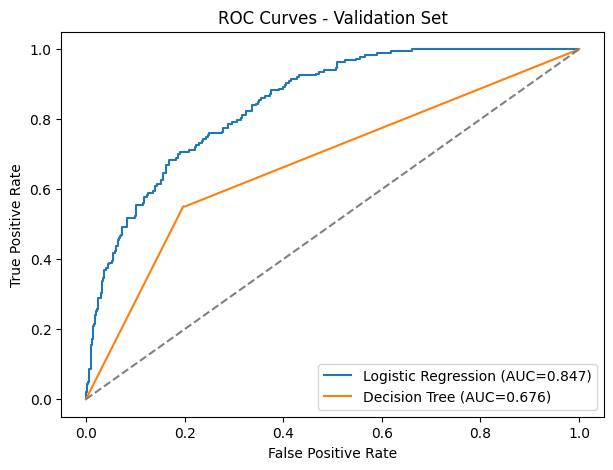

In [8]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves for both models on the validation set
val_prob_log = log_reg_pipe.predict_proba(X_val)[:,1]
val_prob_tree = tree_pipe.predict_proba(X_val)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_val, val_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_val, val_prob_tree)

auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={auc_log:.3f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC={auc_tree:.3f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Validation Set")
plt.legend()
plt.show()
